In [1]:
import tensorflow as tf
from  tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset from a local file
data = np.load('./mnist.npz')
x_train, y_train = data['x_train'], data['y_train']
x_test, y_test = data['x_test'], data['y_test']

# Normalize the images to the range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
#y_train = to_categorical(y_train, 10)
#y_test = to_categorical(y_test, 10)

In [3]:


# Build and compile the model
def build_compile(optimizer_name='SGD', learning_rate=50):
    model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28, 28)),
        keras.layers.Dense(128, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ])
    optimizer = keras.optimizers.get(optimizer_name)
    optimizer.learning_rate = learning_rate
    model.compile(optimizer=optimizer,
                  loss=keras.losses.SparseCategoricalCrossentropy(),
                  metrics=['accuracy'])
    return model

# Training with fixed learning rate
model_fixed_lr = build_compile(learning_rate=50)
history_fixed_lr = model_fixed_lr.fit(
    x_train, y_train, epochs=50, batch_size=32, validation_data=(x_test, y_test)
)


Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 725.4529 - accuracy: 0.1006 - val_loss: 17.9713 - val_accuracy: 0.0974
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 18.3659 - accuracy: 0.0991 - val_loss: 18.5928 - val_accuracy: 0.0892
Epoch 3/50
1875/1875 [==============================] - 6s 3ms/step - loss: 18.2689 - accuracy: 0.1015 - val_loss: 17.9276 - val_accuracy: 0.0982
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 18.3353 - accuracy: 0.0999 - val_loss: 15.1955 - val_accuracy: 0.1135
Epoch 5/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.1329 - accuracy: 0.1031 - val_loss: 26.6320 - val_accuracy: 0.1135
Epoch 6/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.2403 - accuracy: 0.1023 - val_loss: 19.3241 - val_accuracy: 0.1010
Epoch 7/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.4538 - accuracy: 0.0999 - val_loss: 22.6442 

In [4]:
def lr_time_based_decay(epoch, lr):
    initial_lr = 50
    decay = 1e-6
    return initial_lr / (1 + decay * epoch)

model_time_based = build_compile()
history_time_based = model_time_based.fit(
    x_train, y_train, epochs=50, batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_time_based_decay, verbose=1)],
    validation_data=(x_test, y_test)
)



Epoch 1: LearningRateScheduler setting learning rate to 50.0.
Epoch 1/50
1875/1875 [==============================] - 8s 4ms/step - loss: 478.3052 - accuracy: 0.0985 - val_loss: 17.3317 - val_accuracy: 0.1028 - lr: 50.0000

Epoch 2: LearningRateScheduler setting learning rate to 49.999950000050006.
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 18.2130 - accuracy: 0.1006 - val_loss: 14.0387 - val_accuracy: 0.1032 - lr: 50.0000

Epoch 3: LearningRateScheduler setting learning rate to 49.9999000002.
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.4330 - accuracy: 0.1010 - val_loss: 16.5087 - val_accuracy: 0.0980 - lr: 49.9999

Epoch 4: LearningRateScheduler setting learning rate to 49.99985000045.
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 17.9351 - accuracy: 0.1015 - val_loss: 18.0628 - val_accuracy: 0.1010 - lr: 49.9999

Epoch 5: LearningRateScheduler setting learning rate to 49.9998000008.
Ep

1875/1875 [==============================] - 6s 3ms/step - loss: 18.0834 - accuracy: 0.0990 - val_loss: 19.9420 - val_accuracy: 0.0982 - lr: 49.9983

Epoch 36: LearningRateScheduler setting learning rate to 49.99825006124786.
Epoch 36/50
1875/1875 [==============================] - 6s 3ms/step - loss: 18.3458 - accuracy: 0.0993 - val_loss: 18.9306 - val_accuracy: 0.1135 - lr: 49.9982

Epoch 37: LearningRateScheduler setting learning rate to 49.99820006479767.
Epoch 37/50
1875/1875 [==============================] - 7s 3ms/step - loss: 18.2988 - accuracy: 0.1017 - val_loss: 17.8792 - val_accuracy: 0.1028 - lr: 49.9982

Epoch 38: LearningRateScheduler setting learning rate to 49.998150068447465.
Epoch 38/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.2738 - accuracy: 0.1005 - val_loss: 15.9822 - val_accuracy: 0.0980 - lr: 49.9981

Epoch 39: LearningRateScheduler setting learning rate to 49.99810007219726.
Epoch 39/50
1875/1875 [==============================] - 7s

In [5]:
def lr_step_decay(epoch, lr):
    initial_lr = 50
    drop = 0.5
    epochs_drop = 5
    return initial_lr * (drop ** ((1 + epoch) // epochs_drop))

model_step_decay = build_compile()
history_step_decay = model_step_decay.fit(
    x_train, y_train, epochs=50, batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_step_decay, verbose=1)],
    validation_data=(x_test, y_test)
)



Epoch 1: LearningRateScheduler setting learning rate to 50.0.
Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 1806.0101 - accuracy: 0.1028 - val_loss: 15.8107 - val_accuracy: 0.1028 - lr: 50.0000

Epoch 2: LearningRateScheduler setting learning rate to 50.0.
Epoch 2/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.4399 - accuracy: 0.0978 - val_loss: 27.7843 - val_accuracy: 0.1028 - lr: 50.0000

Epoch 3: LearningRateScheduler setting learning rate to 50.0.
Epoch 3/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.1123 - accuracy: 0.1022 - val_loss: 16.1273 - val_accuracy: 0.0958 - lr: 50.0000

Epoch 4: LearningRateScheduler setting learning rate to 50.0.
Epoch 4/50
1875/1875 [==============================] - 7s 4ms/step - loss: 18.3779 - accuracy: 0.0997 - val_loss: 16.2468 - val_accuracy: 0.1028 - lr: 50.0000

Epoch 5: LearningRateScheduler setting learning rate to 25.0.
Epoch 5/50
1875/1875 [=====================

1875/1875 [==============================] - 6s 3ms/step - loss: 2.3040 - accuracy: 0.1066 - val_loss: 2.3070 - val_accuracy: 0.1135 - lr: 0.3906

Epoch 38: LearningRateScheduler setting learning rate to 0.390625.
Epoch 38/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3043 - accuracy: 0.1070 - val_loss: 2.3026 - val_accuracy: 0.0974 - lr: 0.3906

Epoch 39: LearningRateScheduler setting learning rate to 0.390625.
Epoch 39/50
1875/1875 [==============================] - 7s 3ms/step - loss: 2.3041 - accuracy: 0.1070 - val_loss: 2.3041 - val_accuracy: 0.1028 - lr: 0.3906

Epoch 40: LearningRateScheduler setting learning rate to 0.1953125.
Epoch 40/50
1875/1875 [==============================] - 8s 4ms/step - loss: 2.3027 - accuracy: 0.1073 - val_loss: 2.3022 - val_accuracy: 0.1135 - lr: 0.1953

Epoch 41: LearningRateScheduler setting learning rate to 0.1953125.
Epoch 41/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3027 - accuracy: 0.1077 - v

In [6]:
def lr_exponential_decay(epoch, lr):
    initial_lr = 50
    k = 0.1
    return initial_lr * tf.math.exp(-k * epoch).numpy()

model_exponential_decay = build_compile()
history_exponential_decay = model_exponential_decay.fit(
    x_train, y_train, epochs=50, batch_size=32,
    callbacks=[keras.callbacks.LearningRateScheduler(lr_exponential_decay, verbose=1)],
    validation_data=(x_test, y_test)
)



Epoch 1: LearningRateScheduler setting learning rate to 50.0.
Epoch 1/50
1875/1875 [==============================] - 7s 4ms/step - loss: 4004.8704 - accuracy: 0.1018 - val_loss: 21.7510 - val_accuracy: 0.1010 - lr: 50.0000

Epoch 2: LearningRateScheduler setting learning rate to 45.2418714761734.
Epoch 2/50
1875/1875 [==============================] - 7s 3ms/step - loss: 15.7073 - accuracy: 0.1014 - val_loss: 17.7405 - val_accuracy: 0.1010 - lr: 45.2419

Epoch 3: LearningRateScheduler setting learning rate to 40.93653857707977.
Epoch 3/50
1875/1875 [==============================] - 7s 3ms/step - loss: 13.8138 - accuracy: 0.1004 - val_loss: 13.4177 - val_accuracy: 0.0980 - lr: 40.9365

Epoch 4: LearningRateScheduler setting learning rate to 37.04091012477875.
Epoch 4/50
1875/1875 [==============================] - 6s 3ms/step - loss: 11.5446 - accuracy: 0.1014 - val_loss: 13.0979 - val_accuracy: 0.0982 - lr: 37.0409

Epoch 5: LearningRateScheduler setting learning rate to 33.51600170


Epoch 36: LearningRateScheduler setting learning rate to 1.5098691917955875.
Epoch 36/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3131 - accuracy: 0.1021 - val_loss: 2.3133 - val_accuracy: 0.0974 - lr: 1.5099

Epoch 37: LearningRateScheduler setting learning rate to 1.366186235100031.
Epoch 37/50
1875/1875 [==============================] - 7s 4ms/step - loss: 2.3117 - accuracy: 0.1028 - val_loss: 2.3129 - val_accuracy: 0.1134 - lr: 1.3662

Epoch 38: LearningRateScheduler setting learning rate to 1.2361763045191765.
Epoch 38/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3102 - accuracy: 0.1045 - val_loss: 2.3121 - val_accuracy: 0.0980 - lr: 1.2362

Epoch 39: LearningRateScheduler setting learning rate to 1.1185386218130589.
Epoch 39/50
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3096 - accuracy: 0.1033 - val_loss: 2.3091 - val_accuracy: 0.1028 - lr: 1.1185

Epoch 40: LearningRateScheduler setting learning rate to

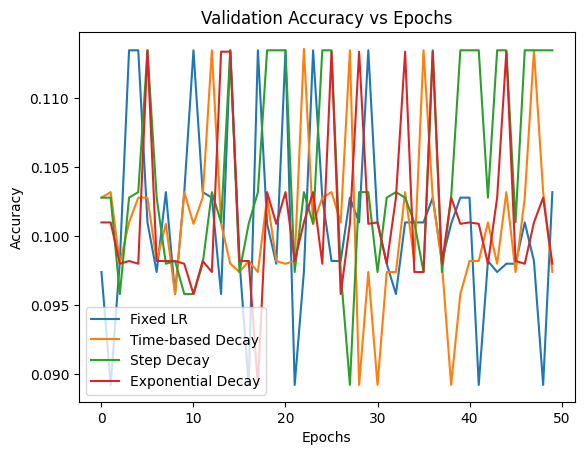

In [7]:
plt.plot(history_fixed_lr.history['val_accuracy'], label='Fixed LR')
plt.plot(history_time_based.history['val_accuracy'], label='Time-based Decay')
plt.plot(history_step_decay.history['val_accuracy'], label='Step Decay')
plt.plot(history_exponential_decay.history['val_accuracy'], label='Exponential Decay')

plt.title('Validation Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
